<a href="https://colab.research.google.com/github/Ian-Ibrahim/SU-Machine-learning-1222785/blob/main/RL12thJune2023MLclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def print_map(array):
    plt.imshow(array, cmap='hot', vmin=np.min(array), vmax=np.max(array))
    plt.show()

In [ ]:
e_rows = 11
e_cols = 11

q_values = np.zeros((e_rows, e_cols, 4))

In [ ]:
actions = ['up', 'right', 'down', 'left']

Environment setup

In [ ]:
rewards = np.full((e_rows, e_cols), -100.)
rewards[0,5]=100
# this defines the home location i.e if a robot the place it will go back to AKA the goal state
aisles = {}

aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

for row_index in range(1, 10):
  for col_index in aisles[row_index]:
    rewards[row_index,col_index]=-1

for row in rewards:
  print(row)

[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


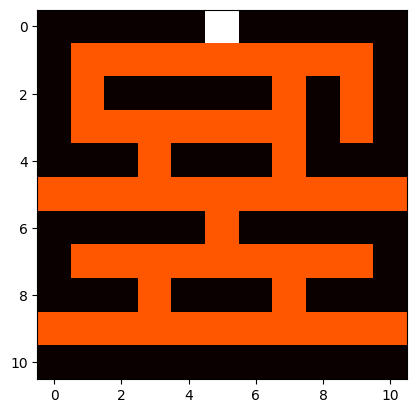

In [ ]:
# alt way to print the rows
# the print map function that was defined earlier in previous cells
print_map(rewards)

Training

In [ ]:
# check if we are back at goal state
def is_terminal_state(current_row_index,current_col_index):
  if rewards[current_row_index,current_col_index]==-1.:
    return False
  else:
    return True

In [ ]:
# randomly pick a location
def get_start_loc():
  cur_row_index=np.random.randint(e_rows)
  cur_col_index=np.random.randint(e_cols)
  while is_terminal_state(cur_row_index,cur_col_index):
    cur_row_index=np.random.randint(e_rows)
    cur_col_index=np.random.randint(e_cols)
  return cur_row_index,cur_col_index

In [ ]:
# wdj
def get_next_loc(cur_row_index,cur_col_index,action_index):
  new_row_index=cur_row_index
  new_col_index=cur_col_index

  if actions[action_index]=='up' and cur_row_index>0:
    new_row_index-=1
  elif actions[action_index]=='down' and cur_row_index<e_rows-1:
    new_row_index+=1
  elif actions[action_index]=='right' and cur_col_index<e_cols-1:
    new_col_index+=1
  elif actions[action_index]=='left' and cur_col_index>0:
    new_col_index-=1

  return new_row_index,new_col_index

In [ ]:
def get_next_act(cur_row_index,cur_col_index,epsilon):
  if np.random.random()<epsilon:
    return np.argmax(q_values[cur_row_index,cur_col_index])
  else:
    return np.random.randint(4)

In [ ]:
def get_shortest_path(start_row, start_col):
  if is_terminal_state(start_row, start_col):
    return []
  else:
    cur_row_index,cur_col_index=start_row, start_col
    shortest_path =[]
    shortest_path.append([cur_row_index,cur_col_index])
    while not is_terminal_state(cur_row_index,cur_col_index):
      action_index=get_next_act(cur_row_index,cur_col_index,1.)
      cur_row_index,cur_col_index=get_next_loc(cur_row_index,cur_col_index,action_index)
      shortest_path.append([cur_row_index,cur_col_index])

    return shortest_path

In [ ]:
epsilon=0.9
discountFactor=0.9
learningRate=0.9



for episode in range(1000):
    row_index, col_index = get_start_loc()

    while not is_terminal_state(row_index, col_index):
        action_index = get_next_act(row_index, col_index, epsilon)

        old_row_index, old_col_index = row_index, col_index
        row_index, col_index = get_next_loc(row_index, col_index, action_index)

        reward = rewards[row_index,col_index]
        old_q_value=q_values[row_index,col_index,action_index]
        td = reward+  (discountFactor * np.max(q_values[row_index, col_index])) - old_q_value
        new_q_value=old_q_value+(learningRate*td)
        q_values[old_row_index, old_col_index ,action_index]=new_q_value

print('training complete')

training complete


In [ ]:
print(get_shortest_path(5,1))

[[5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5], [0, 5]]


In [ ]:
print(q_values)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-9.00000000e+01  5.70051512e+01  2.66894010e+01 -9.00000000e+01]
  [-9.00000000e+01  6.36320342e+01 -9.00000000e+01 -1.07019000e+01]
  [-9.00000000e+01  7.09143234e+01 -9.00000000